# Algorithmic Complexity

Notebook to show how the number of steps changes with the complexity of an algorithm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time 

In [2]:
n_sizes = np.linspace(1, 15, 15, dtype=int)

In [3]:
def generate_input(input_size):
    "Function to create array of certain size"
    array = np.random.random(size=int(input_size))
    return array

In [4]:
def constant(input_array):
    "Function with algorithm of constant complexity"
    step_count = 1
    return step_count

In [5]:
def linear(input_array):
    "Function with algorithm of linear complexity"
    step_count = 1
    for element in input_array:
        step_count += 1
    return step_count

In [6]:
def loglinear(input_array):
    "Function with algorithm of loglinear complexity"
    step_count = 1
    iterations = len(input_array)
    while iterations > 1:
        iterations = iterations / 2
        step_count += 1
    return step_count

In [7]:
def quadratic(input_array):
    "Function with algorithm of quadratic complexity"
    step_count = 1
    for first_value in input_array:
        for second_value in input_array:
            step_count += 1
    return step_count

In [8]:
def gen_steps(complexity_func, input_sizes):
    "Given the function complexity generate time data for all sizes"
    inputs = list(map(generate_input, input_sizes))
    list_of_times = []
    for each_input in inputs:
        steps = complexity_func(each_input)
        list_of_times.append(steps)
    assert len(list_of_times) == len(input_sizes)
    return np.asarray(list_of_times)

Generate step counts for each size of input.

In [9]:
constant_steps = gen_steps(constant, n_sizes)
linear_steps = gen_steps(linear, n_sizes)
loglinear_steps = gen_steps(loglinear, n_sizes)
quadratic_steps = gen_steps(quadratic, n_sizes)

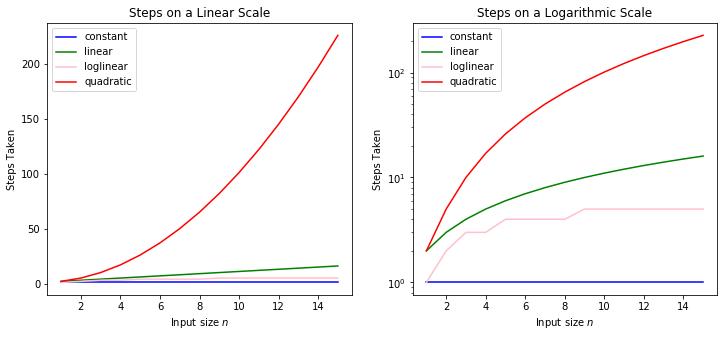

In [10]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(n_sizes, constant_steps, label="constant", c="b")
ax1.plot(n_sizes, linear_steps, label="linear", c="g");
ax1.plot(n_sizes, loglinear_steps, label="loglinear", c="pink");
ax1.plot(n_sizes, quadratic_steps, label="quadratic", c="r");
ax1.set_xlabel("Input size $n$")
ax1.set_title("Steps on a Linear Scale")
ax1.set_ylabel("Steps Taken")
ax1.legend();

ax2.plot(n_sizes, constant_steps, label="constant", c="b")
ax2.plot(n_sizes, linear_steps, label="linear", c="g");
ax2.plot(n_sizes, loglinear_steps, label="loglinear", c="pink");
ax2.plot(n_sizes, quadratic_steps, label="quadratic", c="r");
ax2.set_xlabel("Input size $n$")
ax2.set_ylabel("Steps Taken")
ax2.set_title("Steps on a Logarithmic Scale")

ax2.set_yscale("log")
ax2.legend();

plt.savefig("../images/complexity.png")